Auteur : Audrey Hohmann

# Projet P4 : Anticipez les besoins en consommation de bâtiments
## Notebook: prédire la consommation totale d’énergie de bâtiments non destinés à l’habitation

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl

from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [8]:
pd.options.mode.chained_assignment = None 

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('data_P4_clean.csv') 

In [11]:
df.head()

,OSEBuildingID,proportionparking,Proportionbat,old_built,PropertyGFATotal,NumberofBuildings,NumberofFloors,mean_GFA_per_floor,prop_gfa_largest_property,diff_prop_gfa_largest_property_per_type,SteamUse(kBtu)_pct,Electricity(kBtu)_pct,NaturalGas(kBtu)_pct,Longitude,Latitude,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,ENERGYSTARScore,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_infrequent_sklearn,PrimaryPropertyType_Large Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,PrimaryPropertyType_infrequent_sklearn,Neighborhood_lcaps_downtown,Neighborhood_lcaps_east,Neighborhood_lcaps_greater duwamish,Neighborhood_lcaps_lake union,Neighborhood_lcaps_magnolia / queen anne,Neighborhood_lcaps_northeast,Neighborhood_lcaps_northwest,Neighborhood_lcaps_infrequent_sklearn,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_infrequent_sklearn,BuildingType,PrimaryPropertyType,Neighborhood_lcaps,LargestPropertyUseType,BuildingType_cat,PrimaryPropertyType_cat,Neighborhood_lcaps_cat,LargestPropertyUseType_cat
0,1,0.000000,1.000000,89,88434,1.0,12,6802.615385,1.000000,0.114542,0.277302,0.546060,0.176638,-122.33799,47.61220,7456910.0,84.300003,249.98,2.83,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
1,2,0.145453,0.854547,20,103566,1.0,11,7375.166667,0.809918,-0.075540,0.000000,0.386609,0.613391,-122.33393,47.61317,8664479.0,97.900002,295.86,2.86,61.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
2,5,0.000000,1.000000,90,61320,1.0,10,5574.545455,1.000000,0.114542,0.325913,0.407519,0.266567,-122.33664,47.61412,6946800.5,113.300003,286.43,4.67,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10
3,9,0.382349,0.617651,17,97288,1.0,2,20030.000000,0.913062,0.000000,0.000000,0.609884,0.390116,-122.33657,47.61623,12581712.0,141.600006,301.81,3.10,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nonresidential COS,Other,downtown,Police Station,1,8,3,36
4,10,0.000000,1.000000,90,83008,1.0,11,6917.333333,0.980050,0.094592,0.000000,0.488160,0.511840,-122.33283,47.61390,6062767.5,74.500000,176.14,2.12,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NonResidential,Hotel,downtown,Hotel,0,2,3,10


In [12]:
df.isna().sum()

OSEBuildingID                                          0
proportionparking                                      0
Proportionbat                                          0
old_built                                              0
PropertyGFATotal                                       0
NumberofBuildings                                      0
NumberofFloors                                         0
mean_GFA_per_floor                                     0
prop_gfa_largest_property                              0
diff_prop_gfa_largest_property_per_type                0
SteamUse(kBtu)_pct                                     0
Electricity(kBtu)_pct                                  0
NaturalGas(kBtu)_pct                                   0
Longitude                                              0
Latitude                                               0
SiteEnergyUseWN(kBtu)                                  0
SiteEUIWN(kBtu/sf)                                     0
TotalGHGEmissions              

In [13]:
ls_mod=['proportionparking','Proportionbat', 'old_built', 'PropertyGFATotal','NumberofBuildings',
        'NumberofFloors', 
        'mean_GFA_per_floor', 'prop_gfa_largest_property', 
        'diff_prop_gfa_largest_property_per_type', 'SteamUse(kBtu)_pct', 'Electricity(kBtu)_pct', 
        'NaturalGas(kBtu)_pct', 
        'Longitude', 'Latitude']

In [14]:
target = 'SiteEnergyUseWN(kBtu)'

# avec feature OHE

In [15]:
# avec feature OHE
cols_ohe = ls_mod + list(df.loc[:,(df.columns.str.startswith(('BuildingType_', 'PrimaryPropertyType_', 'Neighborhood_lcaps_', 'LargestPropertyUseType_')) & (~df.columns.str.endswith(('_cat'))))])

In [16]:
cols_ohe

['proportionparking',
 'Proportionbat',
 'old_built',
 'PropertyGFATotal',
 'NumberofBuildings',
 'NumberofFloors',
 'mean_GFA_per_floor',
 'prop_gfa_largest_property',
 'diff_prop_gfa_largest_property_per_type',
 'SteamUse(kBtu)_pct',
 'Electricity(kBtu)_pct',
 'NaturalGas(kBtu)_pct',
 'Longitude',
 'Latitude',
 'BuildingType_NonResidential',
 'BuildingType_Nonresidential COS',
 'BuildingType_infrequent_sklearn',
 'PrimaryPropertyType_Large Office',
 'PrimaryPropertyType_Mixed Use Property',
 'PrimaryPropertyType_Other',
 'PrimaryPropertyType_Retail Store',
 'PrimaryPropertyType_Small- and Mid-Sized Office',
 'PrimaryPropertyType_Warehouse',
 'PrimaryPropertyType_Worship Facility',
 'PrimaryPropertyType_infrequent_sklearn',
 'Neighborhood_lcaps_downtown',
 'Neighborhood_lcaps_east',
 'Neighborhood_lcaps_greater duwamish',
 'Neighborhood_lcaps_lake union',
 'Neighborhood_lcaps_magnolia / queen anne',
 'Neighborhood_lcaps_northeast',
 'Neighborhood_lcaps_northwest',
 'Neighborhood_lcaps

In [17]:
df_ml = df[cols_ohe + [target]]

In [18]:
df_ml.shape

(1245, 40)

In [19]:
X = df_ml[cols_ohe]
y = df_ml[target]

In [20]:
y.head()

0     7456910.0
1     8664479.0
2     6946800.5
3    12581712.0
4     6062767.5
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (933, 39) et y_train de forme (933,) 
Nous avons X_test de forme (312, 39) et y_test de forme (312,) 


In [23]:
scaler = StandardScaler()
std_scaler = scaler.fit(X) 
X_std = std_scaler.transform(X)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# avec LabelEncoder

In [24]:
# avec feature LE
cols_le = ls_mod + list(df.loc[:, df.columns.str.endswith(('_cat'))])

In [25]:
cols_le

['proportionparking',
 'Proportionbat',
 'old_built',
 'PropertyGFATotal',
 'NumberofBuildings',
 'NumberofFloors',
 'mean_GFA_per_floor',
 'prop_gfa_largest_property',
 'diff_prop_gfa_largest_property_per_type',
 'SteamUse(kBtu)_pct',
 'Electricity(kBtu)_pct',
 'NaturalGas(kBtu)_pct',
 'Longitude',
 'Latitude',
 'BuildingType_cat',
 'PrimaryPropertyType_cat',
 'Neighborhood_lcaps_cat',
 'LargestPropertyUseType_cat']

In [26]:
X_le = df[cols_le]
y_le = df[target]

In [27]:
scaler = StandardScaler()
X_le_std = scaler.fit_transform(X_le)

In [28]:
X_train_std_le, X_test_std_le, y_train_le, y_test_le = train_test_split(X_le_std, y_le, test_size=0.25, random_state=42)

In [29]:
#transformation en df
X_train_std_le_df = pd.DataFrame(X_train_std_le, columns = X_le.columns)
X_test_std_le_df = pd.DataFrame(X_test_std_le, columns = X_le.columns)

# Déclaration des modèles linéaires testés

In [30]:
# baseline moyenne du jeu d'entraînement
dummyR = DummyRegressor(strategy="mean")

In [25]:
reglasso = linear_model.Lasso(tol=0.01, random_state=42)

In [26]:
regridge = linear_model.Ridge(random_state=42) 

In [27]:
regrEN = linear_model.ElasticNet(random_state=42)

In [28]:
dtreereg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42)

# Sans validation croisée

## Création de la baseline 

In [31]:
dummyR.fit(X_train_std, y_train)

DummyRegressor()

In [33]:
y_pred_dummy_mean = dummyR.predict(X_test_std)

In [34]:
y_pred_dummy_mean.mean()

3271514.351737932

In [35]:
y_pred_dummy_mean.std()

0.0

In [36]:
def score(estimator, X_train, y_train, X_test, y_test): 
    """ compute and print train score and test score """
    """ Return the coefficient of determination R^2 of the prediction."""
    tr_score = estimator.score(X_train, y_train)
    te_score = estimator.score(X_test, y_test)
    
    print(f"score train : {tr_score} and score test : {te_score} " )

In [37]:
score(dummyR, X_train_std, y_train, X_test_std, y_test)

score train : 0.0 and score test : -0.006834210332761881 


## Modèles de prédiction linéaire

### Lasso

In [172]:
reglasso.fit(X_train_std, y_train)

Lasso(random_state=42, tol=0.01)

In [36]:
y_pred_reglasso = reglasso.predict(X_test_std)

In [37]:
score(reglasso, X_train_std, y_train, X_test_std, y_test)

score train : 0.5409751507799149 and score test : 0.5422057068072688 


### Regression Ridge

In [38]:
regridge.fit(X_train_std, y_train)

Ridge(random_state=42)

In [39]:
y_pred_regridge = regridge.predict(X_test_std)

In [40]:
score(regridge, X_train_std, y_train, X_test_std, y_test)

score train : 0.5409457149913388 and score test : 0.5435466784774845 


### Elastic net

In [41]:
regrEN.fit(X_train_std, y_train)

ElasticNet(random_state=42)

In [42]:
y_pred_regrEN = regrEN.predict(X_test_std)

In [43]:
score(regrEN, X_train_std, y_train, X_test_std, y_test)

score train : 0.5049829974658608 and score test : 0.5141170239875312 


### Decision Tree Regressor

In [44]:
dtreereg.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42)

In [45]:
y_pred_DT = dtreereg.predict(X_test_std)

In [46]:
score(dtreereg, X_train_std, y_train, X_test_std, y_test)

score train : 0.5981649731019416 and score test : 0.47783211355224164 


In [47]:
print("Affichage des scores test pour l'ensemble des modèles linéaires testés:")
print()
print("Mean absolute error (dummy): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_dummy_mean)))
print("Mean absolute error (Elastic Net): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_regrEN)))
print("Mean absolute error (Ridge regression): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_regridge)))
print("Mean absolute error (Lasso): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_reglasso)))
print("Mean absolute error (Decision Tree Regressor): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_DT)))
print()
print("Root mean squared error (dummy): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_dummy_mean, squared=False)))                                                                     
print("Root mean squared error (Elastic Net): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_regrEN, squared=False)))                                                                   
print("Root mean squared error (Ridge Regression): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_regridge, squared=False)))
print("Root mean squared error (Lasso): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_reglasso, squared=False)))
print("Root mean squared error (Decision Tree Regressor): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_DT, squared=False)))
print()
print("r2_score (dummy mean): {:.2f}".format(metrics.r2_score(y_test, y_pred_dummy_mean)))
print("r2_score (Elastic Net): {:.2f}".format(metrics.r2_score(y_test, y_pred_regrEN)))
print("r2_score (Ridge Regression {:.2f}".format(metrics.r2_score(y_test, y_pred_regridge)))
print("r2_score (Lasso) {:.2f}".format(metrics.r2_score(y_test, y_pred_reglasso)))
print("r2_score (Decision Tree Regressor) {:.2f}".format(metrics.r2_score(y_test, y_pred_DT)))

Affichage des scores test pour l'ensemble des modèles linéaires testés:

Mean absolute error (dummy): 2529365.61
Mean absolute error (Elastic Net): 1690617.80
Mean absolute error (Ridge regression): 1614519.34
Mean absolute error (Lasso): 1617363.06
Mean absolute error (Decision Tree Regressor): 1701495.69

Root mean squared error (dummy): 3388795.85
Root mean squared error (Elastic Net): 2354139.89
Root mean squared error (Ridge Regression): 2281731.88
Root mean squared error (Lasso): 2285081.07
Root mean squared error (Decision Tree Regressor): 2440458.94

r2_score (dummy mean): -0.01
r2_score (Elastic Net): 0.51
r2_score (Ridge Regression 0.54
r2_score (Lasso) 0.54
r2_score (Decision Tree Regressor) 0.48


# Modèles linéaires avec validation croisée

rmse_scorer = metrics.make_scorer(metrics.mean_squared_error, squared=False)

In [158]:
def scores (estimator, name_scoring, ncv, X, y) : 
    scores_estimator = cross_validate(estimator, X, y, scoring=name_scoring, cv=ncv)
    for score in name_scoring:
        scores_test = scores_estimator['test_' + score].mean().round(4)
        std_test= scores_estimator['test_' + score].std().round(4)
    
        print(f"Avec le modèle linéaire en validation croisée : {estimator}, le {score} moyen est de {scores_test}, avec un écart-type de {std_test}") 

In [166]:
cv_dummy = scores(dummyR, ['neg_root_mean_squared_error', 'r2'] , 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : DummyRegressor(), le neg_root_mean_squared_error moyen est de -3012040.5518, avec un écart-type de 237014.1311
Avec le modèle linéaire en validation croisée : DummyRegressor(), le r2 moyen est de -0.004, avec un écart-type de 0.0044


In [160]:
scores(dtreereg, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42), le neg_root_mean_squared_error moyen est de -2262807.7173, avec un écart-type de 236330.0625
Avec le modèle linéaire en validation croisée : DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42), le r2 moyen est de 0.4239, avec un écart-type de 0.1151


In [161]:
scores(regrEN, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : ElasticNet(random_state=42), le neg_root_mean_squared_error moyen est de -2158126.6212, avec un écart-type de 238446.3124
Avec le modèle linéaire en validation croisée : ElasticNet(random_state=42), le r2 moyen est de 0.4813, avec un écart-type de 0.0803


In [162]:
scores(regridge, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : Ridge(random_state=42), le neg_root_mean_squared_error moyen est de -2122361.8145, avec un écart-type de 234617.9717
Avec le modèle linéaire en validation croisée : Ridge(random_state=42), le r2 moyen est de 0.4924, avec un écart-type de 0.1134


In [173]:
scores(reglasso, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std, y_train)

Avec le modèle linéaire en validation croisée : Lasso(random_state=42, tol=0.01), le neg_root_mean_squared_error moyen est de -2123449.2032, avec un écart-type de 233737.6615
Avec le modèle linéaire en validation croisée : Lasso(random_state=42, tol=0.01), le r2 moyen est de 0.4918, avec un écart-type de 0.1143


# Modèles ensemblistes avec validation croisée


In [235]:
rf_clf = RandomForestRegressor(n_estimators=100, max_features=0.8, min_samples_leaf=5, 
                            max_depth=15, random_state=42, n_jobs=-1)

In [236]:
scores(rf_clf, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std_le, y_train_le)

Avec le modèle linéaire en validation croisée : RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=5,
                      n_jobs=-1, random_state=42), le neg_root_mean_squared_error moyen est de -1984605.279, avec un écart-type de 223761.6332
Avec le modèle linéaire en validation croisée : RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=5,
                      n_jobs=-1, random_state=42), le r2 moyen est de 0.5593, avec un écart-type de 0.0833


In [56]:
gb_clf = GradientBoostingRegressor(n_estimators=100, 
               learning_rate=0.1, max_depth=20, max_features=0.8, random_state=42)

In [156]:
scores(gb_clf, ['neg_root_mean_squared_error', 'r2'], 10, X_train_std_le, y_train_le)

Avec le modèle linéaire en validation croisée : GradientBoostingRegressor(max_depth=20, max_features=0.8, random_state=42), le neg_root_mean_squared_error moyen est de -2153856.3134, avec un écart-type de 257451.7128
Avec le modèle linéaire en validation croisée : GradientBoostingRegressor(max_depth=20, max_features=0.8, random_state=42), le r2 moyen est de 0.4771, avec un écart-type de 0.1155


# Modèles linéaires avec recherche des hyperparamètres optimaux

In [58]:
def GSCVscores(estimator, parameters, X, y, ncv=10, scoring=None, transform_target=False, random_state=42):
    
    parameters_used = parameters.copy()
    
    if transform_target:
        for key in parameters.keys():
            parameters_used[f'regressor__{key}'] = parameters_used[key]
            parameters_used.pop(key)
    
    if scoring is None:
        scoring = ['r2','neg_root_mean_squared_error','neg_mean_absolute_error']
        
    clf = GridSearchCV(estimator, param_grid=parameters_used,n_jobs=-1, scoring=scoring, 
                       cv=ncv, refit='neg_root_mean_squared_error')
    clf.fit(X, y)
    df_gridscv = pd.DataFrame(clf.cv_results_)
    results = {'score': [], 'best_score': [], 'best_params': [], 'fit_time': []}
    for score in scoring:
        df_gridscv_best = df_gridscv[df_gridscv[f'mean_test_{score}'] == df_gridscv[f'mean_test_{score}'].max()]
        results['score'].append(score)
        results['best_score'].append(df_gridscv_best[f'mean_test_{score}'].values[0])
        results['best_params'].append(df_gridscv_best['params'].values[0])
        results['fit_time'].append(df_gridscv_best['mean_fit_time'].values[0])

    return pd.DataFrame(results)

### Lasso

In [59]:
lasso_parameters = {'alpha': np.array(range(1, 31)) / 10, 'tol': [0.0001, 0.001, 0.01]}

In [60]:
from sklearn.compose import TransformedTargetRegressor

In [61]:
def log_target(x):
    return np.log(x + 1)

def inv_log_target(x):
    return np.exp(x) - 1

In [174]:
results_lasso = GSCVscores(reglasso, lasso_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [175]:
results_lasso

,score,best_score,best_params,fit_time
0,r2,4.917595e-01,"{'alpha': 3.0, 'tol': 0.01}",0.043277
1,neg_root_mean_squared_error,-2.123447e+06,"{'alpha': 3.0, 'tol': 0.01}",0.043277
2,neg_mean_absolute_error,-1.482213e+06,"{'alpha': 3.0, 'tol': 0.01}",0.043277


In [218]:
1.480810e+06

1480810.0

In [177]:
results_ridge = GSCVscores(regridge,lasso_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [178]:
results_ridge

,score,best_score,best_params,fit_time
0,r2,4.933575e-01,"{'alpha': 3.0, 'tol': 0.0001}",0.001636
1,neg_root_mean_squared_error,-2.120915e+06,"{'alpha': 3.0, 'tol': 0.0001}",0.001636
2,neg_mean_absolute_error,-1.480810e+06,"{'alpha': 3.0, 'tol': 0.0001}",0.001636


### Elastic net

In [66]:
EN_parameters = {'alpha': np.array(range(1, 31)) / 10, 'l1_ratio': np.arange(0.01, 1, 0.1), 'tol': [0.0001, 0.001, 0.01]}

In [179]:
results_EN = GSCVscores(regrEN, EN_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [180]:
results_EN

,score,best_score,best_params,fit_time
0,r2,4.967258e-01,"{'alpha': 0.3, 'l1_ratio': 0.7100000000000001, 'tol': 0.01}",0.006275
1,neg_root_mean_squared_error,-2.118034e+06,"{'alpha': 0.5, 'l1_ratio': 0.91, 'tol': 0.01}",0.007616
2,neg_mean_absolute_error,-1.480601e+06,"{'alpha': 0.1, 'l1_ratio': 0.91, 'tol': 0.01}",0.027974


### Decision Tree Regressor

In [69]:
DTR_parameters={"criterion": ["squared_error", "absolute_error"], 
                "splitter":["best","random"],
            "max_depth" : [2, 3, 5, 10, 20],
           "min_samples_leaf":[5, 10, 20, 50, 100],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [181]:
results_DTR = GSCVscores(dtreereg, DTR_parameters,
                   X_train_std, y_train,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [182]:
results_DTR

,score,best_score,best_params,fit_time
0,r2,4.568850e-01,"{'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'splitter': 'best'}",0.006901
1,neg_root_mean_squared_error,-2.200762e+06,"{'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'splitter': 'best'}",0.006901
2,neg_mean_absolute_error,-1.470865e+06,"{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'splitter': 'random'}",0.095905


In [260]:
1.933337e+06

1933337.0

# Modèles ensemblistes avec recherche des hyperparamètres optimaux

### Gradient boosting regressor

In [232]:
GBR_parameters={"loss": ["squared_error", "absolute_error"], "n_estimators" : [50, 100, 200],
                                            "learning_rate" : [0.001, 0.01, 0.1, 0.2], 
                                           "max_depth" : [10, 20], "max_features":["sqrt",None]}

In [233]:
results_GBR =  GSCVscores(GradientBoostingRegressor(), GBR_parameters,
                    X_train_std_le, y_train_le,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [234]:
results_GBR

,score,best_score,best_params,fit_time
0,r2,5.798524e-01,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}",7.511226
1,neg_root_mean_squared_error,-1.933337e+06,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}",7.511226
2,neg_mean_absolute_error,-1.329342e+06,"{'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': None, 'n_estimators': 100}",4.572415


### Random Forest regressor (best model)

In [256]:
RF_parameters={"n_estimators" : [100, 200],
                "criterion": ["squared_error", "absolute_error"], 
            "max_depth" : [10, 20, 30],
           "min_samples_leaf":[5, 10, 20],
           "max_features":["sqrt",'0,8', None],
        "n_jobs": [-1]}

In [257]:
results_RF = GSCVscores(RandomForestRegressor(), RF_parameters,
                    X_train_std_le, y_train_le,
                   scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                   ncv=10)

In [258]:
results_RF

,score,best_score,best_params,fit_time
0,r2,5.656571e-01,"{'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200, 'n_jobs': -1}",1.186999
1,neg_root_mean_squared_error,-1.972163e+06,"{'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 200, 'n_jobs': -1}",1.841200
2,neg_mean_absolute_error,-1.345971e+06,"{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 100, 'n_jobs': -1}",7.213666


# Entraînement des deux meilleurs modèles avec les paramètres optimisés

### Gradient boosting Regressor

In [247]:
gb_clf = GradientBoostingRegressor(n_estimators=200, loss="absolute_error", learning_rate= 0.1, max_depth= 10, max_features='sqrt', random_state=42)

In [248]:
gb_clf.fit(X_train_std_le, y_train_le)

GradientBoostingRegressor(loss='absolute_error', max_depth=10,
                          max_features='sqrt', n_estimators=200,
                          random_state=42)

In [249]:
score(gb_clf, X_train_std_le, y_train_le, X_test_std_le, y_test_le)

score train : 0.9429797830871376 and score test : 0.6106858287964068 


In [276]:
y_test_pred = gb_clf.predict(X_test_std_le)

In [278]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_le, y_test_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_le, y_test_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.3f}".format(metrics.r2_score(y_test_le, y_test_pred)))


Mean absolute error (Random forest regressor): 1452469.97
Root mean squared error (Random forest regressor): 2107252.27
r2_score (Random forest regressor): 0.611


### Random Forest Regressor (meilleur modèle retenu)

In [267]:
clf = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_features=None, min_samples_leaf=5, 
                            max_depth=20, random_state=42, n_jobs=-1)

In [268]:
clf.fit(X_train_std_le, y_train_le)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [269]:
score(clf, X_train_std_le, y_train_le, X_test_std_le, y_test_le)

score train : 0.8076257476473849 and score test : 0.6138159327484611 


In [283]:
y_test_pred = clf.predict(X_test_std_le)

In [284]:
y_test_pred[0:5]

array([3665673.65479086, 3593138.38305355, 1201854.48121959,
       2417209.12437967, 7208902.12717816])

In [285]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_le, y_test_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_le, y_test_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.3f}".format(metrics.r2_score(y_test_le, y_test_pred)))


Mean absolute error (Random forest regressor): 1437355.90
Root mean squared error (Random forest regressor): 2098763.98
r2_score (Random forest regressor): 0.614


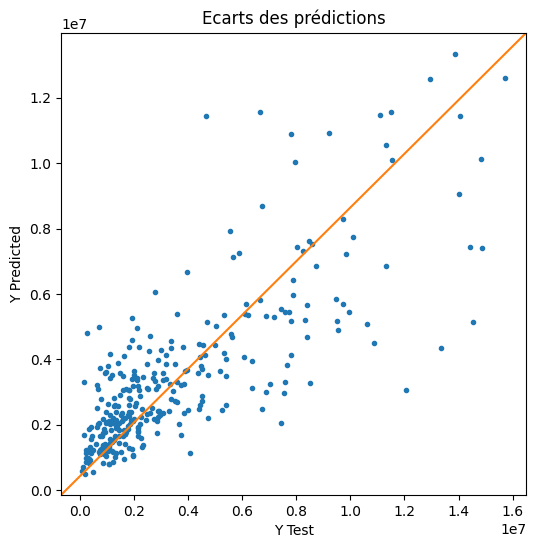

In [286]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(y_test_le, y_test_pred, '.')
ax.plot([0,1], [0,1], transform=ax.transAxes)

plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('Ecarts des prédictions')
plt.show()

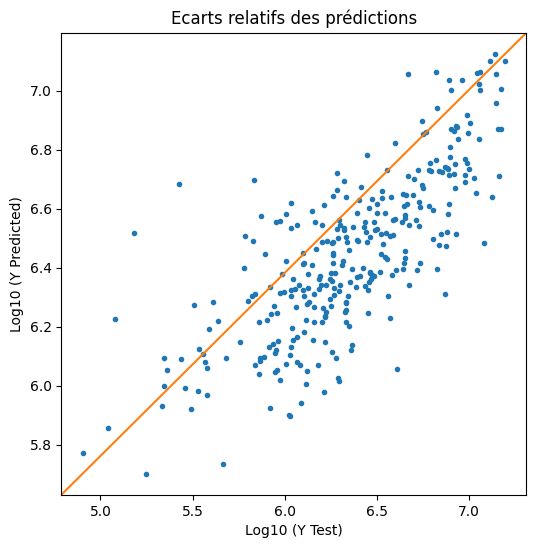

In [287]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(np.log10(y_test_le + 1), np.log10(y_test_pred + 1), '.')
ax.plot([0,1], [0,1], transform=ax.transAxes)

plt.xlabel('Log10 (Y Test)')
plt.ylabel('Log10 (Y Predicted)')
plt.title('Ecarts relatifs des prédictions')
plt.show()

In [ ]:
# Affichage des écarts relatifs pour une meilleure interprétation des erreurs (entre 10 m et 20 m facteur 2 d'erreur = même proportion que pour des écarts entre 300 000 et 600 0000 = facteur 2 d'erreur)
# écarts homogènes dans l'espace où les bâtiments sont plus nombreux, 
# écarts minimum dans les échelles des targets où nous avons peu d'exemples (bâtiments peu consommateurs en énergie ou bâtiments très consommateurs en énergie) car certains features doivent être caractéristiques 
#prédictions sous estimées 
#modèle stable dans l'échelle des targets à prédire


In [ ]:
#symmetric mean absolute percentage error

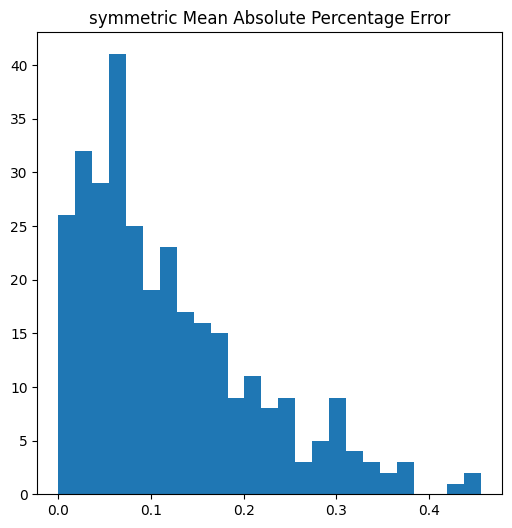

In [289]:
plt.figure(figsize=(6,6))

plt.hist(np.abs(y_test_le - y_test_pred)  / (y_test_le.values + y_test_pred)  /2, bins=25)
#plt.xlabel('Y Test')
#plt.ylabel('Y Predicted')
plt.title('symmetric Mean Absolute Percentage Error')
plt.show()

In [ ]:
# la plupart des erreurs sont inférieures à 10 % pour ce modèle

# Analyse des features importances

https://blog.octo.com/introduction-a-linterpretation-de-modeles-de-machine-learning/

## Explications globales 

In [206]:
# get importance
importances = clf.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [207]:
df_features = pd.DataFrame()
df_features['importances'] = importances
df_features['features'] = cols_le
df_features['std_importances'] = std_importances
df_features = df_features.sort_values('importances', ascending=False)

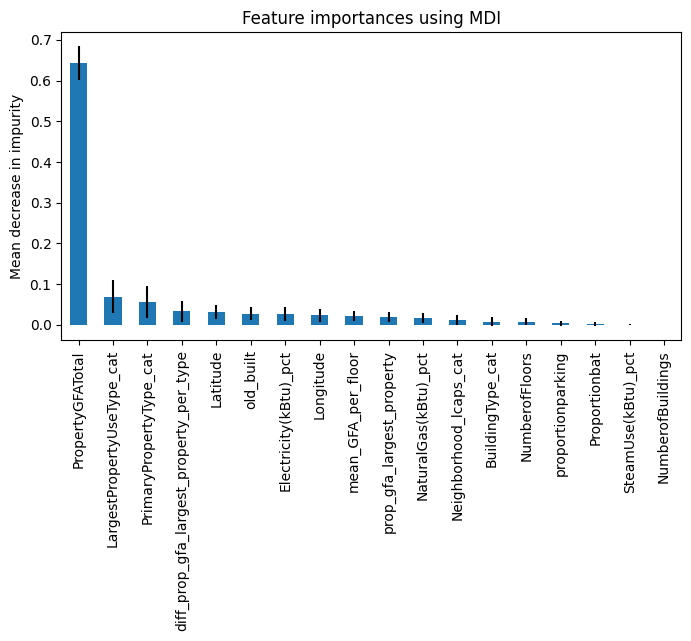

In [298]:
forest_importances = pd.Series(df_features['importances'].values, 
                               index=df_features['features'].values)


forest_importances.plot(yerr=df_features['std_importances'].values, kind='bar', figsize=(8,4))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [209]:
df_features

,importances,features,std_importances
3,0.642414,PropertyGFATotal,0.041940
17,0.068655,LargestPropertyUseType_cat,0.040352
15,0.055642,PrimaryPropertyType_cat,0.040048
8,0.033342,diff_prop_gfa_largest_property_per_type,0.025289
13,0.031850,Latitude,0.017854
2,0.027691,old_built,0.015942
10,0.026339,Electricity(kBtu)_pct,0.017030
12,0.023311,Longitude,0.015157
6,0.020524,mean_GFA_per_floor,0.012218
7,0.019239,prop_gfa_largest_property,0.013054


## SHAP feature importance

In [86]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [210]:
import shap

In [211]:
shap.initjs()

In [212]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_std_le_df)

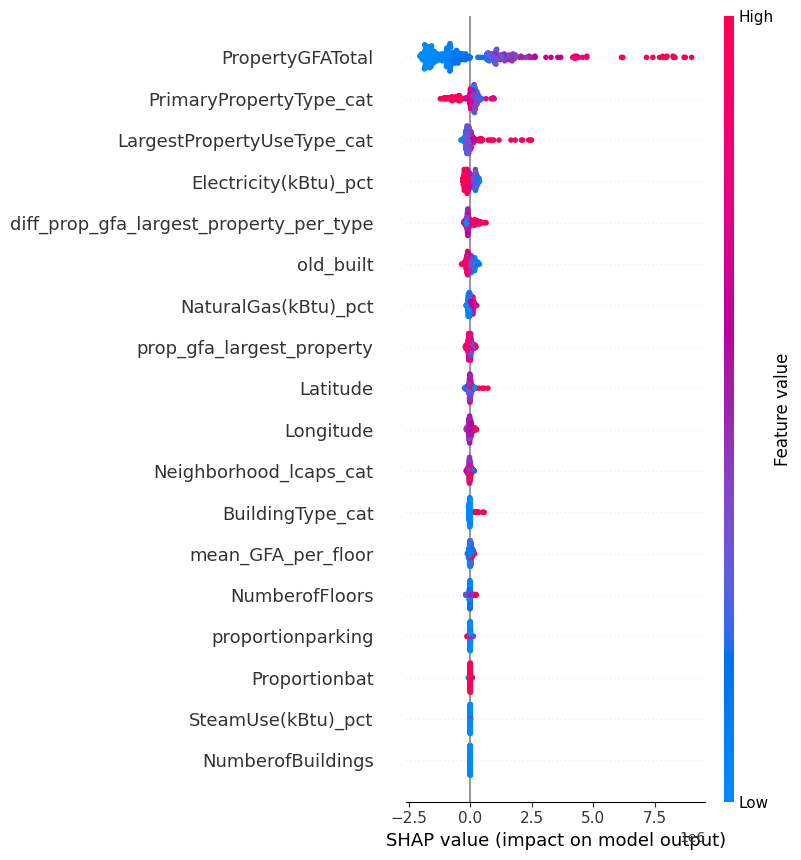

In [213]:
shap.summary_plot(shap_values, X_test_std_le_df)

# Analyse de l’influence de l’EnergyStarScore

In [91]:
df_ml_E = df[cols_le + ['ENERGYSTARScore'] + [target]].dropna()

In [92]:
df_ml_E.shape

(794, 20)

In [93]:
X_le_energy = df_ml_E[cols_le + ['ENERGYSTARScore']]
y_le_energy = df_ml_E[target]

In [94]:
# la taille de dataset est diminué
X_le_energy.shape

(794, 19)

In [95]:
X_le_std_energy = scaler.fit_transform(X_le_energy)

In [96]:
X_train_std_le_E, X_test_std_le_E, y_train_E, y_test_E = train_test_split(X_le_std_energy, y_le_energy, test_size=0.25, random_state=42)

In [97]:
print(f"Nous avons X_train avec EnergyStarScore de forme {X_train_std_le_E.shape} et y_train de forme {y_train_E.shape} ")
print(f"Nous avons X_test avec EnergyStarScore de forme {X_test_std_le_E.shape} et y_test de forme {y_test_E.shape} ")

Nous avons X_train avec EnergyStarScore de forme (595, 19) et y_train de forme (595,) 
Nous avons X_test avec EnergyStarScore de forme (199, 19) et y_test de forme (199,) 


In [98]:
X_test_std_le_E_df = pd.DataFrame(X_test_std_le_E, columns = X_le_energy.columns)

## EnergyStarScore : Entraînement du random forest regressor (best model) avec les paramètres optimisés

In [304]:
clf = RandomForestRegressor(n_estimators=200, criterion="squared_error", max_features=None, min_samples_leaf=5, 
                            max_depth=20, random_state=42, n_jobs=-1)

In [305]:
clf.fit(X_train_std_le_E, y_train_E)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [306]:
y_test_E_pred = clf.predict(X_test_std_le_E)

In [307]:
score(clf, X_train_std_le_E, y_train_E, X_test_std_le_E, y_test_E)

score train : 0.8984639521955997 and score test : 0.7298390777554034 


In [308]:
y_test_E_pred[0:5]

array([1041802.60438675, 1466536.68552843, 8144709.67161781,
       2421098.88142086, 4843454.68044314])

In [309]:
print("Mean absolute error (Random forest regressor): {:.2f}".format(metrics.mean_absolute_error(y_test_E, y_test_E_pred)))

print("Root mean squared error (Random forest regressor): {:.2f}".format(metrics.mean_squared_error(y_test_E, y_test_E_pred, squared=False)))                                                                     

print("r2_score (Random forest regressor): {:.2f}".format(metrics.r2_score(y_test_E, y_test_E_pred)))


Mean absolute error (Random forest regressor): 1175697.34
Root mean squared error (Random forest regressor): 1861012.86
r2_score (Random forest regressor): 0.73


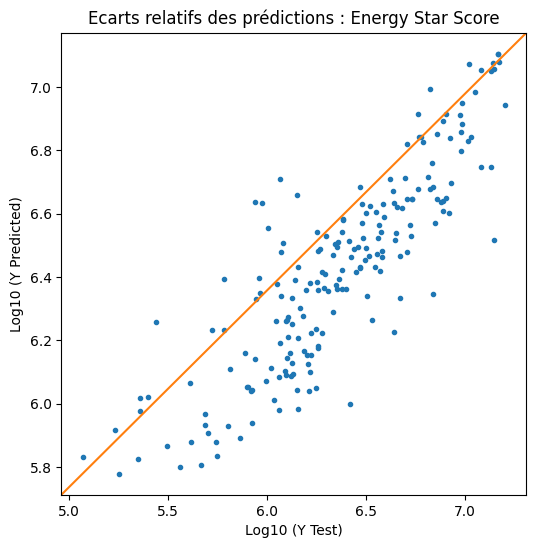

In [310]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(np.log10(y_test_E + 1), np.log10(y_test_E_pred + 1), '.')
ax.plot([0,1], [0,1], transform=ax.transAxes)

plt.xlabel('Log10 (Y Test)')
plt.ylabel('Log10 (Y Predicted)')
plt.title('Ecarts relatifs des prédictions : Energy Star Score')
plt.show()

In [106]:
## Energy en plus : Analyse de l'importance des features

In [107]:
# get importance
importances = clf.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [108]:
df_features = pd.DataFrame()
df_features['importances'] = importances
df_features['features'] = X_test_std_le_E_df.columns
df_features['std_importances'] = std_importances
df_features = df_features.sort_values('importances', ascending=False)

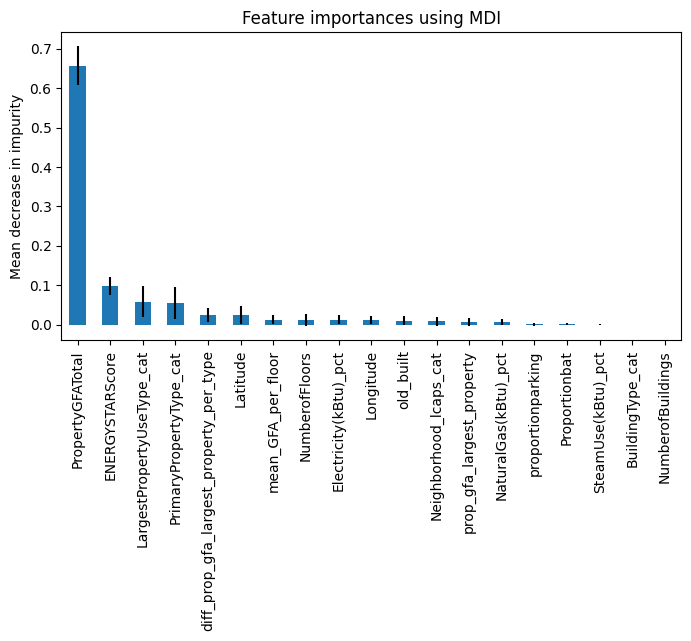

In [109]:
forest_importances = pd.Series(df_features['importances'].values, 
                               index=df_features['features'].values)


forest_importances.plot(yerr=df_features['std_importances'].values, kind='bar', figsize=(8,4))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [110]:
df_features

,importances,features,std_importances
3,0.656782,PropertyGFATotal,0.049324
18,0.097962,ENERGYSTARScore,0.023696
17,0.057659,LargestPropertyUseType_cat,0.039267
15,0.055245,PrimaryPropertyType_cat,0.039958
8,0.024559,diff_prop_gfa_largest_property_per_type,0.018942
13,0.023852,Latitude,0.022265
6,0.013127,mean_GFA_per_floor,0.011874
5,0.012193,NumberofFloors,0.016162
10,0.012004,Electricity(kBtu)_pct,0.011418
12,0.011822,Longitude,0.010341


### Energy : SHAP feature importance

In [111]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_std_le_E_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


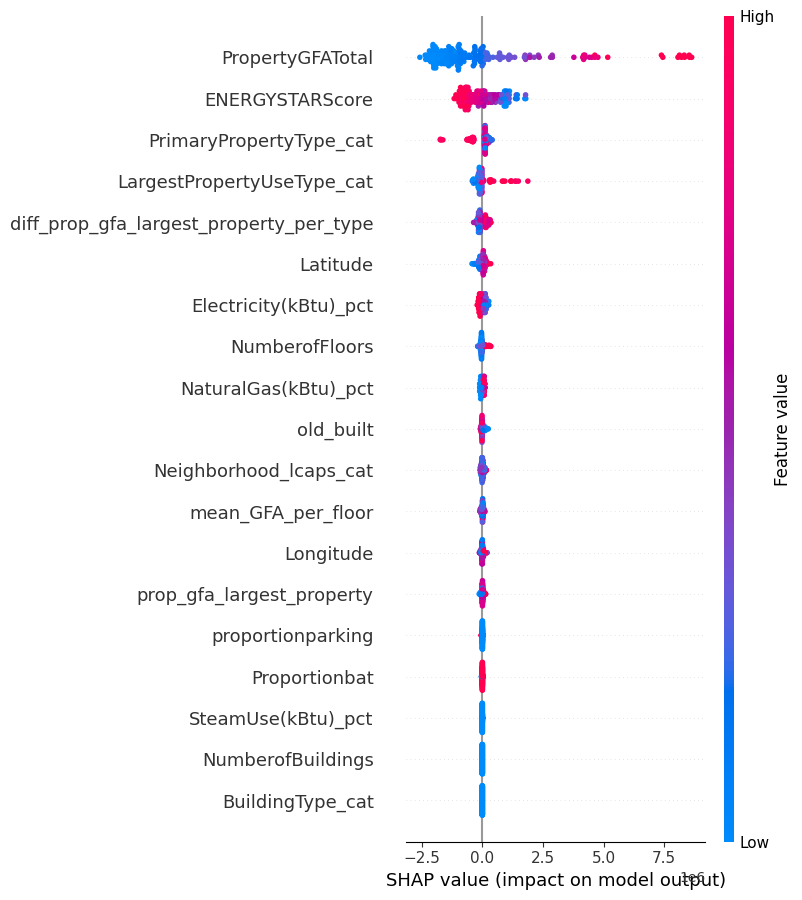

In [112]:
shap.summary_plot(shap_values, X_test_std_le_E_df)